In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubham.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubham.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubham.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from nltk.stem import PorterStemmer 

import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn import preprocessing
import os
import math

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading data
data_full = pd.read_csv("amazondata.csv")
data_full.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
data = data_full[["reviews.text","reviews.title","reviews.rating"]]
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34621 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34621 non-null  object 
 1   reviews.title   34621 non-null  object 
 2   reviews.rating  34621 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [6]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))


In [8]:
preprocessed_texts = []
for row in data['reviews.text']:
    row = BeautifulSoup(row, 'lxml').get_text()
    row = re.sub("\S*\d\S*", "", row).strip()
    row = re.sub('[^A-Za-z]+', ' ', row)
    row = ' '.join(e.lower() for e in row.split() if e.lower() not in stopwords)
    preprocessed_texts.append(row.strip())

In [10]:
data['reviews.text'] = preprocessed_texts

In [9]:
preprocessed_title = []
for row in data['reviews.title']:
    row = BeautifulSoup(row, 'lxml').get_text()
    row = re.sub("\S*\d\S*", "", row).strip()
    row = re.sub('[^A-Za-z]+', ' ', row)
    row = ' '.join(e.lower() for e in row.split() if e.lower() not in stopwords)
    preprocessed_title.append(row.strip())

In [11]:
data['reviews.title'] = preprocessed_title

#### Lemmetization

In [13]:
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 


In [15]:
lam_text = []
for text in data['reviews.text']:
    x = lemmatize_word(text)
    lemm = " ".join(x)
    lam_text.append(lemm)


In [16]:
data['reviews.text'] = lam_text

In [17]:
lam_title = []
for title in data['reviews.title']:
    x = lemmatize_word(title)
    lemm = " ".join(x)
    lam_title.append(lemm)


In [18]:
data['reviews.title'] = lam_title

### EDA

In [19]:
data['reviews.rating'].value_counts()

5.0    23769
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

In [20]:
data['reviews.rating'] = data['reviews.rating'].astype(int)

In [21]:
data

,reviews.text,reviews.title,reviews.rating
0,product far disappoint children love use like ...,kindle,5
1,great beginner experience person buy gift love,fast,5
2,inexpensive tablet use learn step nabi thrill ...,beginner tablet year old son,5
3,fire hd two weeks love tablet great value prim...,good,4
4,buy grand daughter come visit set user enter a...,fantastic tablet kid,5
...,...,...,...
34655,appreciably faster higher amp charger use kind...,appreciably faster charger,3
34656,amazon include charger kindle fact charge us e...,include,1
34657,love kindle fire really disappoint kindle powe...,disappoint charger,1
34658,surprise find come type charge cord purchase o...,worth money,1


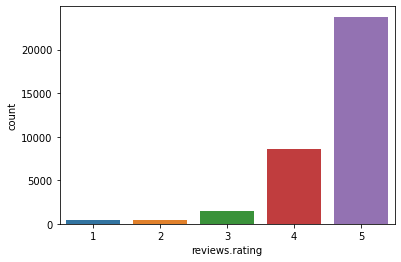

In [23]:
sns.countplot(data['reviews.rating'])
plt.show()

In [ ]:
# from tqdm import tqdm
# from textblob import TextBlob

# text = data['reviews.text']
# correct_body = []

# for sentence in tqdm(text):
#     gfg = TextBlob(sentence)

#     # using TextBlob.correct() method
#     gfg = gfg.correct()

#     correct_body.append(gfg)

    
# title = data['reviews.title']
# correct_title = []

# for sentence in tqdm(text):
#     gfg = TextBlob(sentence)

#     # using TextBlob.correct() method
#     gfg = gfg.correct()

#     correct_title.append(gfg)


# data['reviews.text'] = correct_body
# data['reviews.title'] = correct_title

In [24]:
data.to_csv('data.csv',index = False)

In [25]:
data

,reviews.text,reviews.title,reviews.rating
0,product far disappoint children love use like ...,kindle,5
1,great beginner experience person buy gift love,fast,5
2,inexpensive tablet use learn step nabi thrill ...,beginner tablet year old son,5
3,fire hd two weeks love tablet great value prim...,good,4
4,buy grand daughter come visit set user enter a...,fantastic tablet kid,5
...,...,...,...
34655,appreciably faster higher amp charger use kind...,appreciably faster charger,3
34656,amazon include charger kindle fact charge us e...,include,1
34657,love kindle fire really disappoint kindle powe...,disappoint charger,1
34658,surprise find come type charge cord purchase o...,worth money,1


### Word_cloud for reviews.text

In [26]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForSentiment(sentiments,new_df):
    #sentiment_num = 1 if sentiment== 1 else 0
    temp_df = new_df[new_df['reviews.rating']==sentiments]
    words = " ".join(temp_df['reviews.text'])
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT' and type(w) == str])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1500,
                      height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

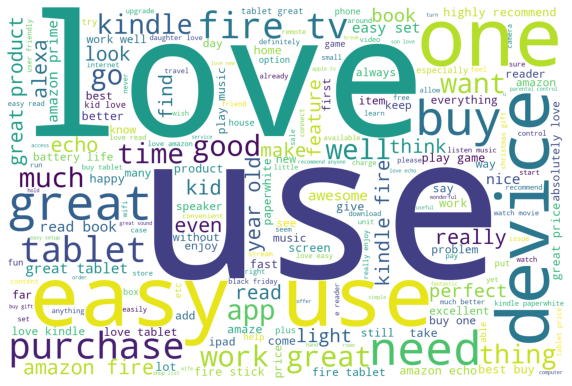

In [27]:
createWrdCloudForSentiment(5.0,data)

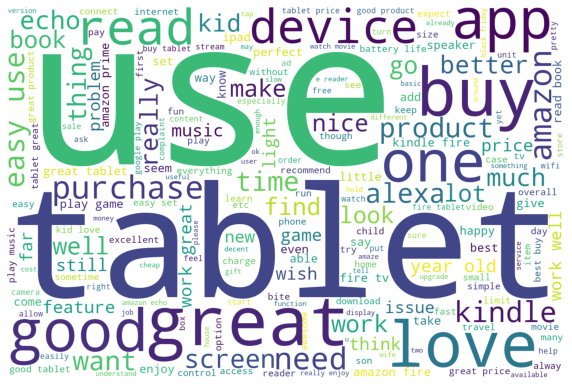

In [28]:
createWrdCloudForSentiment(4.0,data)

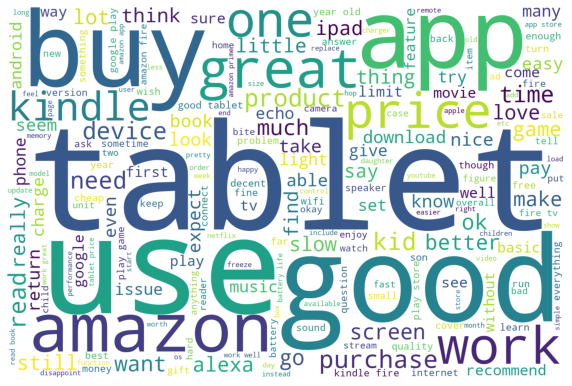

In [29]:
createWrdCloudForSentiment(3.0,data)

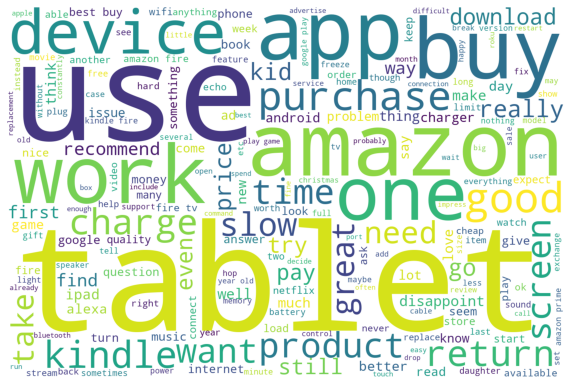

In [30]:
createWrdCloudForSentiment(2.0,data)

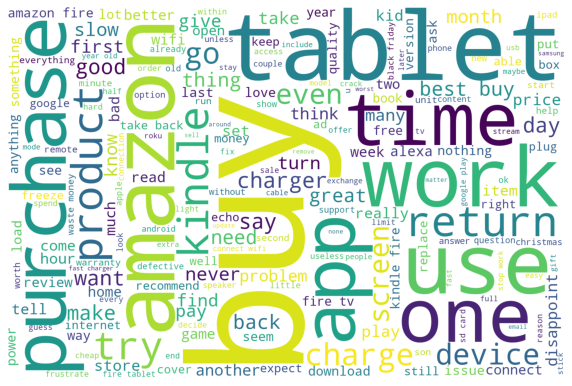

In [31]:
createWrdCloudForSentiment(1.0,data)

### WordCloud for title

In [32]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForTitle(sentiments,new_df):
    #sentiment_num = 1 if sentiment== 1 else 0
    temp_df = new_df[new_df['reviews.rating']==sentiments]
    words = " ".join(temp_df['reviews.title'])
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT' and type(w) == str])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1500,
                      height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

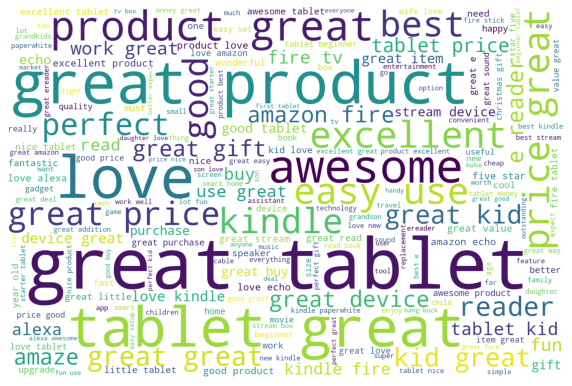

In [33]:
createWrdCloudForTitle(5.0,data)

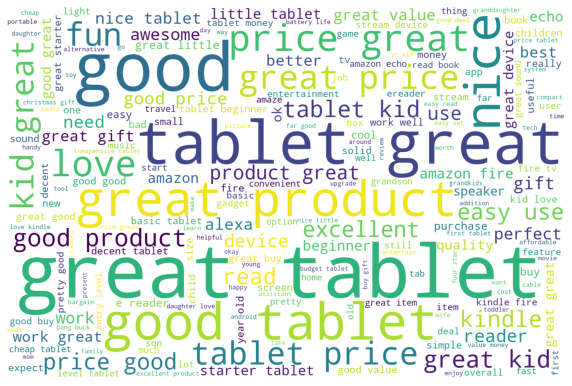

In [34]:
createWrdCloudForTitle(4.0,data)

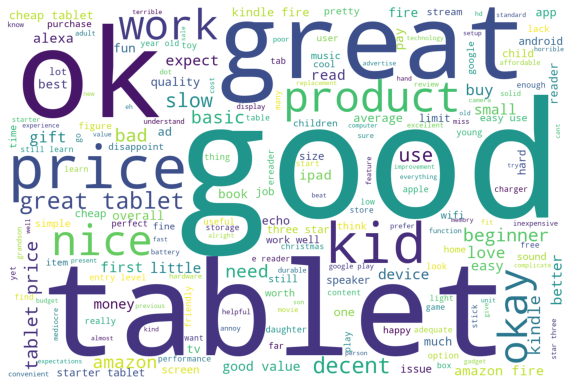

In [35]:
createWrdCloudForTitle(3.0,data)

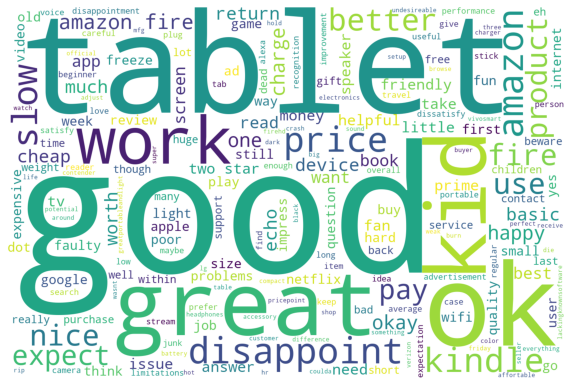

In [36]:
createWrdCloudForTitle(2.0,data)

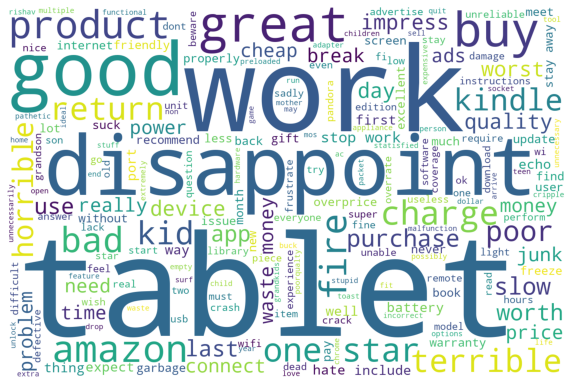

In [37]:
createWrdCloudForTitle(1.0,data)

### TSNE Visualizer

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer(ngram_range=(1,2))

X = tfidf.fit_transform(data['reviews.title'])
y = data['reviews.rating']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer(ngram_range=(1,2))

X = tfidf.fit_transform(data['reviews.text'])
y = data['reviews.rating']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
plt.show()

In [ ]:
sentiment = []

for i in data['reviews.rating'].values:
    if i == 1 or i == 2:
        sentiment.append(0)
    else:
        sentiment.append(1)

data['sentiment'] = sentiment

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(data['reviews.title'])
y = data['sentiment']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(data['reviews.text'])
y = data['sentiment']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
plt.show()

In [ ]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [ ]:
createPieChartFor(data['reviews.rating'])

In [ ]:
createPieChartFor(data['sentiment'])

### Feature Extraction

In [42]:
data['final'] = data['reviews.text']+data['reviews.title']

In [43]:
data.to_csv('data.csv',index = False)

In [44]:
X = data['final']
y = data['reviews.rating'].values

#### train_test_split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(X_train)
test_tfidf_model = vectorizer.transform(X_test)

In [47]:
train_tfidf = pd.DataFrame(train_tfidf_model)
test_tfidf = pd.DataFrame(test_tfidf_model)


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



In [50]:
cls = [LogisticRegression(),
       MultinomialNB(), 
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=1000),
       KNeighborsClassifier(n_neighbors = 5)]

cls_name = []

In [51]:
lbl_actual = y_test
i = 0
accuracy = []
models = []
for cl in cls:
    model = cl.fit(train_tfidf_model,y_train)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    models.append(model)
    i +=1

LogisticRegression  Accuracy Score : 71.86%
              precision    recall  f1-score   support

           1       0.07      0.47      0.12        15
           2       0.01      0.33      0.02         3
           3       0.10      0.52      0.17        81
           4       0.30      0.50      0.37      1260
           5       0.93      0.76      0.84      7297

    accuracy                           0.72      8656
   macro avg       0.28      0.52      0.30      8656
weighted avg       0.83      0.72      0.76      8656

MultinomialNB  Accuracy Score : 69.07%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.02      0.50      0.03        74
           5       1.00      0.69      0.82      8582

    accuracy                           0.69      8656
   macro avg       0.20      0.24      0.17     

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb = MultinomialNB()
nb.fit(train_tfidf_model,y_train)
pred_1 = nb.predict(test_tfidf_model)
print("The Accuracy score of MultinomialNB Classification is",round(accuracy_score(y_test, pred_1)*100,4),"%")

The Accuracy score of MultinomialNB Classification is 69.0735 %


In [54]:
from sklearn.metrics import classification_report
print("-------------Classification Report -----------------")
print(classification_report(y_test, pred_1))

-------------Classification Report -----------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00       411
           4       0.50      0.02      0.03      2103
           5       0.69      1.00      0.82      5948

    accuracy                           0.69      8656
   macro avg       0.24      0.20      0.17      8656
weighted avg       0.60      0.69      0.57      8656



In [55]:
from mord import OrdinalRidge
ordr = OrdinalRidge()
ordr.fit(train_tfidf_model,y_train)
pred_2 = ordr.predict(test_tfidf_model)
print("The Accuracy score of Ordinal Regression is",round(accuracy_score(y_test, pred_2)*100,4),"%")

The Accuracy score of Ordinal Regression is 65.6077 %


In [56]:
X_train1 = train_tfidf_model.toarray().astype(int)
X_test1 = test_tfidf_model.toarray().astype(int)

In [59]:
from mord import LogisticIT
ordr1 = LogisticIT()
ordr1.fit(X_train1,y_train.astype(int))
pred_ = ordr.predict(X_test1)
print("The Accuracy score of LogisticIT  is",round(accuracy_score(y_test, pred_)*100,4),"%")

In [ ]:
from sklearn.metrics import classification_report
print("-------------Classification Report -----------------")
print(classification_report(y_test, pred_2))

In [61]:
X_train = train_tfidf_model
X_test = test_tfidf_model

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)
pred_3 = sv.predict(X_test)
print("The Accuracy score of SVM  is",round(accuracy_score(y_test, pred_3)*100,4),"%")

In [ ]:
from sklearn.metrics import classification_report
print("-------------Classification Report -----------------")
print(classification_report(y_test, pred_3))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, n_estimators=10)
rf.fit(X_train, y_train)
pred_4 = rf.predict(X_test)
print("The Accuracy score of Random Forest Classifier is",round(accuracy_score(y_test, pred_4)*100,4),"%")


In [ ]:
from sklearn.metrics import classification_report
print("-------------Classification Report -----------------")
print(classification_report(y_test, pred_4))

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
pred_5 = lg.predict(X_test)
print("The Accuracy score of LogisticRegression is",round(accuracy_score(y_test, pred_5)*100,4),"%")


### Oversampling of minority classes

In [62]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X1, y1 = oversample.fit_resample(X_train, y_train)


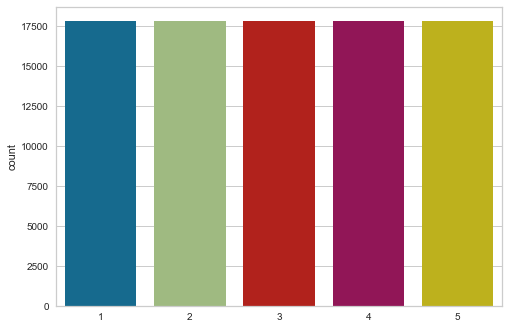

In [64]:
import seaborn as sns
sns.countplot(y1)
plt.show()

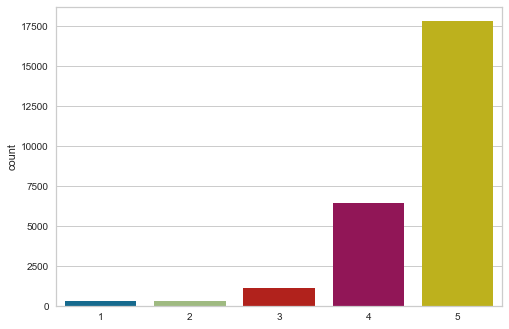

In [66]:
import seaborn as sns
sns.countplot(y_train)
plt.show()

In [67]:
X_train1, X_test1, y_train1, y_test1 = X1, X_test, y1,y_test

In [68]:
print('Train and Test Input shapes: ',X_train1.shape,X_test1.shape)
print('Train and Test Target shapes: ',y_train1.shape,y_test1.shape)

Train and Test Input shapes:  (89105, 21710) (8656, 21710)
Train and Test Target shapes:  (89105,) (8656,)


### results on upsampled data

In [70]:
from sklearn.model_selection import cross_validate


In [72]:
# multinomalNB

In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb = MultinomialNB()
pred_1 = cross_validate(nb, X1, y1, cv=5)
pred_1 = np.mean(pred_1['test_score'])
print("The Accuracy is",round(pred_1*100,4),"%")

The Accuracy is 85.6338 %


In [74]:
# ordinal Ridge

In [78]:
from mord import OrdinalRidge
ordr = OrdinalRidge(alpha = 0.1)
pred_2 = cross_validate(ordr, X1, y1, cv=5)
pred_2 = np.mean(pred_2['test_score'])
print("The neg_mean_absolute_error is",round(pred_2*100,4),"%")

The neg_mean_absolute_error is -22.5678 %


In [79]:
# Logistic IT

In [84]:
from mord import LogisticIT
ordr1 = LogisticIT()
pred_8 = cross_validate(ordr1, X1, y1, cv=5)
pred_8 = np.mean(pred_8['test_score'])
print("The accuracy is",round(pred_8*100,4),"%")

The accuracy is 55.493 %


In [81]:
# Logistic AT

In [82]:
from mord import LogisticAT
ordr1 = LogisticAT()
pred_8 = cross_validate(ordr1, X1, y1, cv=5)
pred_8 = np.mean(pred_8['test_score'])
print("The neg_mean_absolute_error is",round(pred_8*100,4),"%")

The neg_mean_absolute_error is -40.0584 %


### Cross validation

#### OrdinalRidge

In [94]:
# Before Oversampling

In [95]:
import mord
alpha_ = [0.0001,0.001,0.01,0.1,1]
train_accuracy = []
test_accuracy = []
for a in alpha_:
    clf_m = mord.OrdinalRidge(alpha=a)
    clf_m.fit(X_train,y_train)
    y_pred = clf_m.predict(X_test)
    test_accuracy.append(round(accuracy_score(y_test,y_pred)*100,4))
    train_accuracy.append(round(accuracy_score(y_train,clf_m.predict(X_train))*100,4))



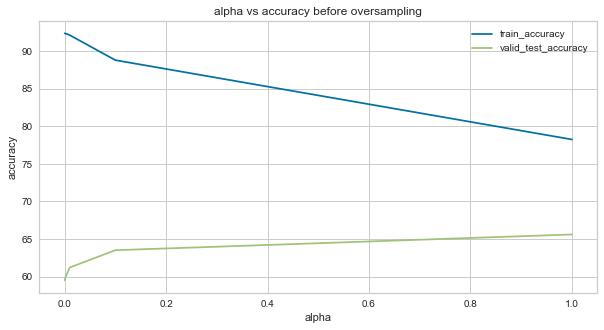

In [96]:
plt.figure(figsize = (10,5))
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('alpha vs accuracy before oversampling')
plt.plot(alpha_,train_accuracy,label='train_accuracy')
plt.plot(alpha_,test_accuracy,label = 'valid_test_accuracy')
plt.legend()

plt.show()

In [97]:
# after oversampling

In [85]:
import mord
alpha_ = [0.0001,0.001,0.01,0.1,1,10]
train_accuracy = []
test_accuracy = []
for a in alpha_:
    clf_m = mord.OrdinalRidge(alpha=a)
    clf_m.fit(X_train1,y_train1)
    y_pred = clf_m.predict(X_test1)
    test_accuracy.append(round(accuracy_score(y_test1,y_pred)*100,4))
    train_accuracy.append(round(accuracy_score(y_train1,clf_m.predict(X_train1))*100,4))



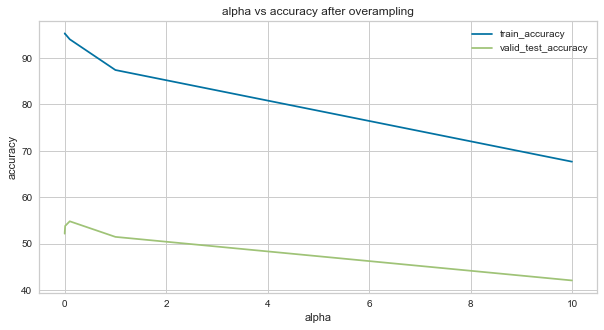

In [90]:
plt.figure(figsize = (10,5))
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('alpha vs accuracy after overampling')
plt.plot(alpha_,train_accuracy,label='train_accuracy')
plt.plot(alpha_,test_accuracy,label = 'valid_test_accuracy')
plt.legend()

plt.show()

In [87]:
clf_m = mord.OrdinalRidge(alpha=0.001)
clf_m.fit(X_train1,y_train1)
y_pred = clf_m.predict(X_test1)


In [88]:
print(classification_report(y_train1,clf_m.predict(X_train1)))

              precision    recall  f1-score   support

           1       1.00      0.99      1.00     17821
           2       0.99      1.00      1.00     17821
           3       0.97      0.98      0.98     17821
           4       0.86      0.93      0.90     17821
           5       0.94      0.86      0.90     17821

    accuracy                           0.95     89105
   macro avg       0.95      0.95      0.95     89105
weighted avg       0.95      0.95      0.95     89105



In [89]:
print(classification_report(y_test1,clf_m.predict(X_test1)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.11      0.05      0.07       102
         2.0       0.05      0.09      0.06        92
         3.0       0.13      0.21      0.16       411
         4.0       0.29      0.45      0.35      2103
         5.0       0.78      0.59      0.67      5948

    accuracy                           0.52      8656
   macro avg       0.22      0.23      0.22      8656
weighted avg       0.61      0.52      0.55      8656



### SVM

In [98]:
#Before Oversampling

In [92]:
from sklearn.svm import SVC
train_acc = []
valid_acc = []
k = [0.01,0.1,1,10]
for n in k:
    model = SVC(C=n)
    scores = cross_validate(model, X_train, y_train,cv=5, return_train_score=True,scoring = 'accuracy')
    print('K = ', n)
    train = np.mean(scores['train_score'])
    test = np.mean(scores['test_score'])
    print('Train Accuracy ' , train)
    print('Test Accuracy ' , test)
    train_acc.append(train)
    valid_acc.append(test)

K =  0.01
Train Accuracy  0.6863470055844407
Test Accuracy  0.6863470055844406
K =  0.1
Train Accuracy  0.6863470055844407
Test Accuracy  0.6863470055844406
K =  1
Train Accuracy  0.8834199884459849
Test Accuracy  0.7124975929135374
K =  10
Train Accuracy  0.9999422299248989
Test Accuracy  0.7123820527633352


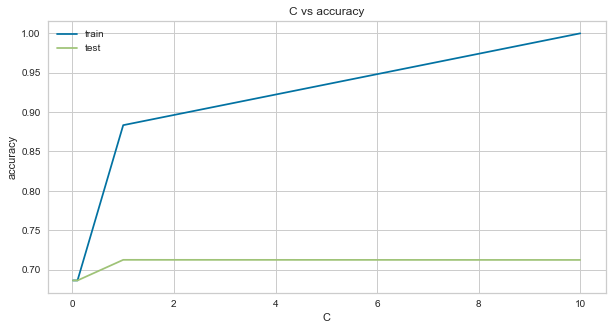

In [93]:
plt.figure(figsize = (10,5))
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('C vs accuracy')
plt.plot(k,train_acc,label='train')
plt.plot(k,valid_acc,label = 'test')
plt.legend()

plt.show()

In [ ]:
clf_m = SVC(C=1)
clf_m.fit(X_train,y_train)
y_pred = clf_m.predict(X_test)


In [ ]:
print(classification_report(y_train,clf_m.predict(X_train)))

In [ ]:
print(classification_report(y_test,clf_m.predict(X_test)))

In [99]:
# After oversampling

In [ ]:
from sklearn.svm import SVC
train_acc1 = []
valid_acc1 = []
k = [0.01,0.1,1,10]
for n in k:
    neigh = SVC(C=n)
    scores = cross_validate(neigh, X_train1, y_train1,cv=5, return_train_score=True,scoring = 'accuracy')
    print('K = ', n)
    train = np.mean(scores['train_score'])
    test = np.mean(scores['test_score'])
    print('Train Accuracy ' , train)
    print('Test Accuracy ' , test)
    train_acc1.append(train)
    valid_acc1.append(test)

In [ ]:
plt.figure(figsize = (10,5))
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('C vs accuracy after oversampling')
plt.plot(k,train_acc1,label='train')
plt.plot(k,valid_acc1,label = 'test')
plt.legend()

plt.show()

In [ ]:
clf_m = SVC(C=1)
clf_m.fit(X_train1,y_train1)
y_pred = clf_m.predict(X_test1)


In [ ]:
print(classification_report(y_train1,clf_m.predict(X_train1)))

In [ ]:
print(classification_report(y_test1,clf_m.predict(X_test1)))